In [22]:
%reset -f

%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from functions import *

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.preprocessing import StandardScaler


# Load each
datasets = {}
for hour in range(24):
    df = pd.read_csv(f"Splits/dataset_hour_{hour}.csv")

    datasets[hour] = deseasonalize(df, "both")

regex_choice = "^(sun_|wind_|temp_)"
pca_percent = 0.8

y_train, y_test, y_train_deseason, y_test_deseason, y_train_season, y_test_season, \
exog_variables_train, scalers, exog_variables_train_stand, exog_variables_test, \
exog_variables_test_stand, pca_train, pca_test = split_data_into_series(datasets, pca_percent, regex_choice)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## AR(1) with constant

SMAPE baseline (24 lags) out of sample prediction: [[287.65190734]
 [ 53.15929718]
 [ 69.80099297]]


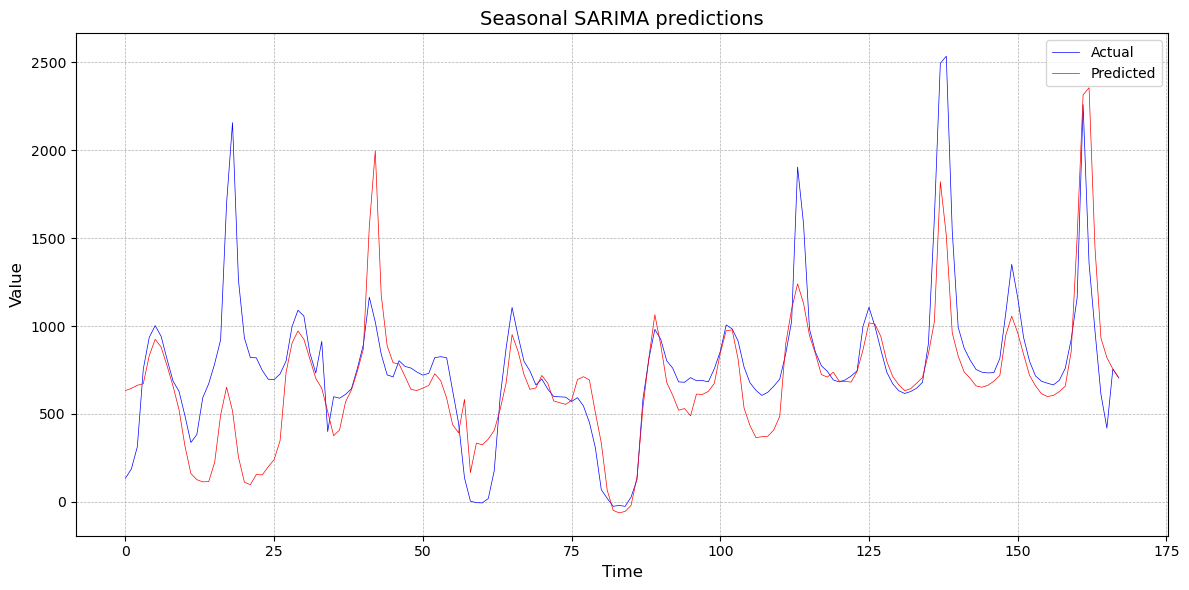

In [24]:
p, d, q = 1, 0, 0 
P, D, Q, s = 0, 0, 0, 0 

smoother_output = 0

predictions_dict = {}

for hour in range(24):
    model = SARIMAX(
        y_train_deseason[hour],
        order=(p, d, q),
        seasonal_order=(P, D, Q, s),
        **{'smoother_output': smoother_output},
        trend='c'
    )
    results = model.fit(disp=False)

    new_results = results.append(y_test_deseason[hour], refit=False)

    predictions = new_results.predict(start=len(y_train_deseason[hour]), end=len(y_train_deseason[hour]) + len(y_test_deseason[hour]) - 1).reshape(-1, 1)

    predictions_dict[hour] = predictions + y_test_season[hour]

combined_predictions, combined_test = combine_24_hour_data(predictions_dict, y_test)

rmse, smape, rmae = out_of_sample_pred(combined_test, combined_predictions)

model_1 = np.array([[rmse], [smape], [rmae]])
combined_predictions_model_1 = combined_predictions

print(f'SMAPE baseline (24 lags) out of sample prediction: {model_1}')

plot_actual_vs_predicted(combined_test, combined_predictions_model_1, "Seasonal SARIMA predictions")

## AR(7) with constant

SMAPE baseline (24 lags) out of sample prediction: [[273.4226598 ]
 [ 51.52245604]
 [ 68.97218228]]


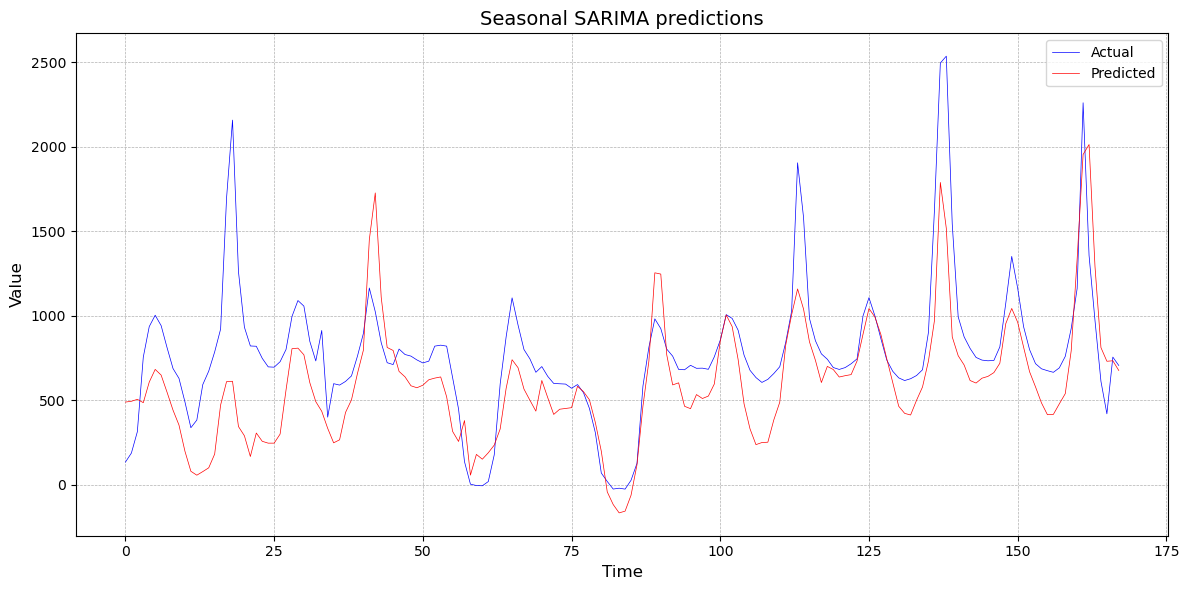

In [25]:
p, d, q = 7, 0, 0 
P, D, Q, s = 0, 0, 0, 0 

smoother_output = 0

predictions_dict = {}

for hour in range(24):
    model = SARIMAX(
        y_train_deseason[hour],
        order=(p, d, q),
        seasonal_order=(P, D, Q, s),
        **{'smoother_output': smoother_output},
        trend='c'
    )
    results = model.fit(disp=False)

    new_results = results.append(y_test_deseason[hour], refit=False)

    predictions = new_results.predict(start=len(y_train_deseason[hour]), end=len(y_train_deseason[hour]) + len(y_test_deseason[hour]) - 1).reshape(-1, 1)

    predictions_dict[hour] = predictions + y_test_season[hour]

combined_predictions, combined_test = combine_24_hour_data(predictions_dict, y_test)

rmse, smape, rmae = out_of_sample_pred(combined_test, combined_predictions)

model_2 = np.array([[rmse], [smape], [rmae]])
combined_predictions_model_2 = combined_predictions

print(f'SMAPE baseline (24 lags) out of sample prediction: {model_2}')

plot_actual_vs_predicted(combined_test, combined_predictions_model_2, "Seasonal SARIMA predictions")

## ARMA(1,1) with constant and trend

Hour 0 done
Hour 1 done
Hour 2 done
Hour 3 done
Hour 4 done
Hour 5 done
Hour 6 done
Hour 7 done
Hour 8 done
Hour 9 done
Hour 10 done
Hour 11 done
Hour 12 done
Hour 13 done
Hour 14 done
Hour 15 done
Hour 16 done
Hour 17 done
Hour 18 done
Hour 19 done
Hour 20 done
Hour 21 done
Hour 22 done
Hour 23 done
SMAPE baseline (24 lags) out of sample prediction: [[277.61510938]
 [ 51.74014679]
 [ 69.85258644]]


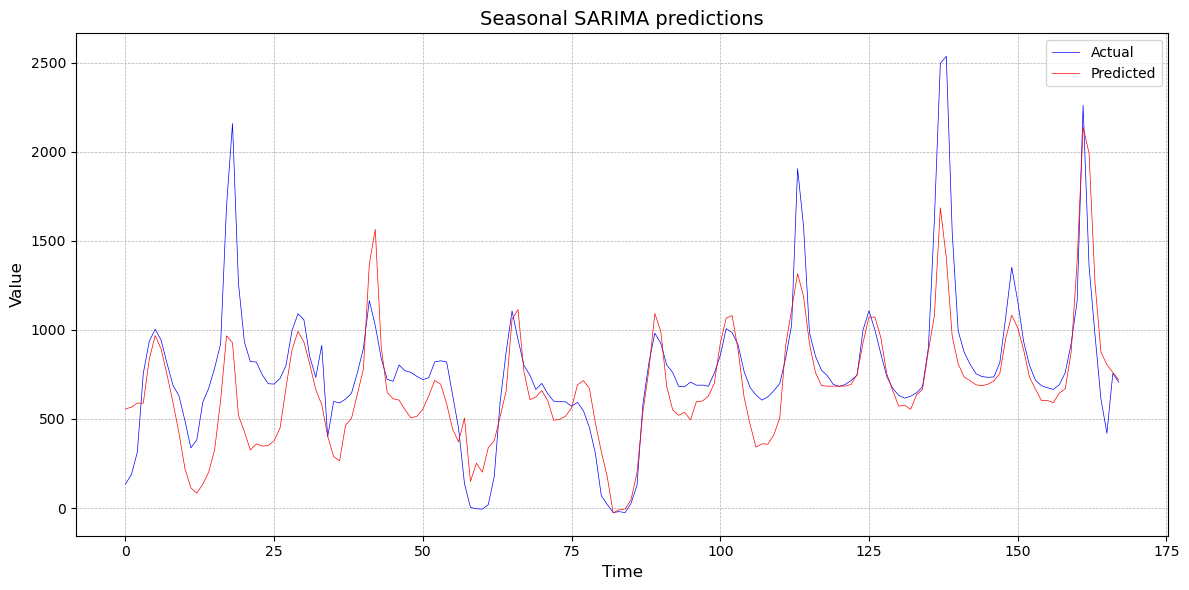

In [ ]:
p, d, q = 1, 0, 1
P, D, Q, s = 0, 0, 0, 0 

smoother_output = 0

predictions_dict = {}

for hour in range(24):
    model = SARIMAX(
        y_train_deseason[hour],
        order=(p, d, q),
        seasonal_order=(P, D, Q, s),
        **{'smoother_output': smoother_output},
        trend='c'
    )
    results = model.fit(disp=False, maxiter=10000)

    new_results = results.append(y_test_deseason[hour], refit=False)

    predictions = new_results.predict(start=len(y_train_deseason[hour]), end=len(y_train_deseason[hour]) + len(y_test_deseason[hour]) - 1).reshape(-1, 1)

    predictions_dict[hour] = predictions + y_test_season[hour]

    print(f'Hour {hour} done')

combined_predictions, combined_test = combine_24_hour_data(predictions_dict, y_test)

rmse, smape, rmae = out_of_sample_pred(combined_test, combined_predictions)

model_3 = np.array([[rmse], [smape], [rmae]])
combined_predictions_model_3 = combined_predictions

print(f'SMAPE baseline (24 lags) out of sample prediction: {model_3}')

plot_actual_vs_predicted(combined_test, combined_predictions_model_3, "Seasonal SARIMA predictions")

## SARIMA((1,0,1), (1,0,1,7)) (seasonal ARMA)

Hour 0 fitted
Hour 1 fitted
Hour 2 fitted
Hour 3 fitted
Hour 4 fitted
Hour 5 fitted
Hour 6 fitted
Hour 7 fitted
Hour 8 fitted
Hour 9 fitted
Hour 10 fitted
Hour 11 fitted
Hour 12 fitted
Hour 13 fitted
Hour 14 fitted
Hour 15 fitted
Hour 16 fitted
Hour 17 fitted
Hour 18 fitted
Hour 19 fitted
Hour 20 fitted
Hour 21 fitted
Hour 22 fitted
Hour 23 fitted
SMAPE baseline (24 lags) out of sample prediction: [[274.96246023]
 [ 50.39424931]
 [ 68.82724143]]


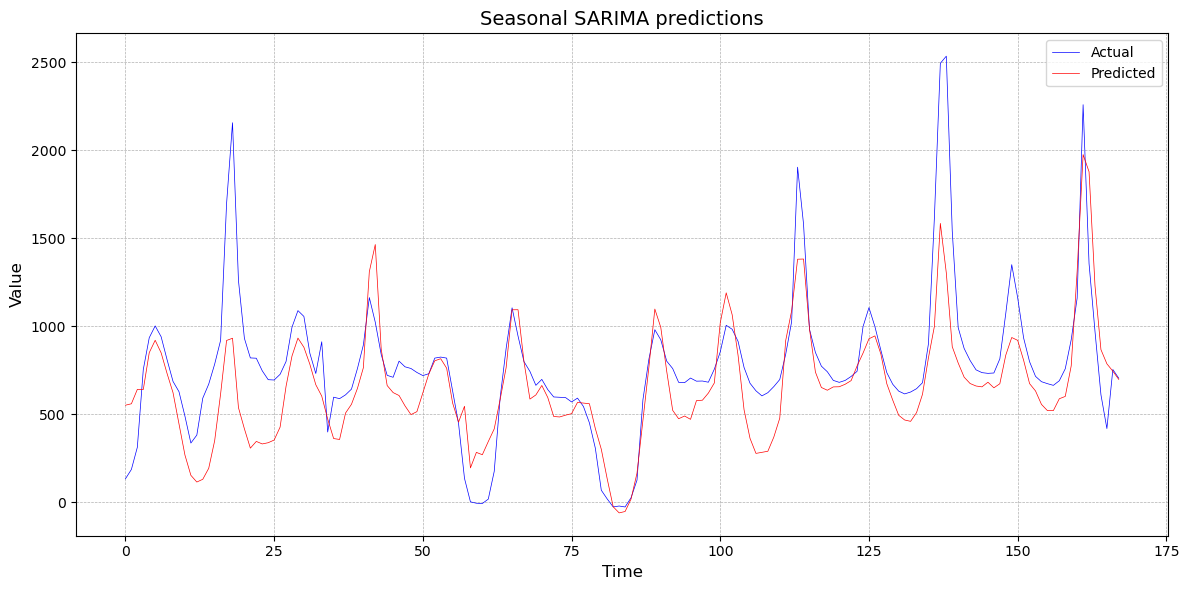

In [19]:
p, d, q = 1, 0, 1
P, D, Q, s = 1, 0, 1, 7 

smoother_output = 0

predictions_dict = {}

for hour in range(24):
    model = SARIMAX(
        y_train_deseason[hour],
        order=(p, d, q),
        seasonal_order=(P, D, Q, s),
        **{'smoother_output': smoother_output},
        trend='c'
    )
    results = model.fit(disp=False, maxiter=50000)

    new_results = results.append(y_test_deseason[hour], refit=False)

    predictions = new_results.predict(start=len(y_train_deseason[hour]), end=len(y_train_deseason[hour]) + len(y_test_deseason[hour]) - 1).reshape(-1, 1)

    predictions_dict[hour] = predictions + y_test_season[hour]

    print(f'Hour {hour} fitted')

combined_predictions, combined_test = combine_24_hour_data(predictions_dict, y_test)

rmse, smape, rmae = out_of_sample_pred(combined_test, combined_predictions)

model_4 = np.array([[rmse], [smape], [rmae]])
combined_predictions_model_4 = combined_predictions

print(f'SMAPE baseline (24 lags) out of sample prediction: {model_4}')

plot_actual_vs_predicted(combined_test, combined_predictions_model_4, "Seasonal SARIMA predictions")

## SARIMA((1,1,1), (1,1,1, 7))

In [ ]:
p, d, q = 1, 1, 1 
P, D, Q, s = 1, 1, 1, 7 

smoother_output = 0

predictions_dict = {}

for hour in range(24):
    model = SARIMAX(
        y_train_deseason[hour],
        order=(p, d, q),
        seasonal_order=(P, D, Q, s),
        **{'smoother_output': smoother_output},
        trend='c'
    )
    results = model.fit(disp=False, maxiter=20000)

    new_results = results.append(y_test_deseason[hour], refit=False)

    predictions = new_results.predict(start=len(y_train_deseason[hour]), end=len(y_train_deseason[hour]) + len(y_test_deseason[hour]) - 1).reshape(-1, 1)

    predictions_dict[hour] = predictions + y_test_season[hour]

    print(f'Hour {hour} fitted')

combined_predictions, combined_test = combine_24_hour_data(predictions_dict, y_test)

rmse, smape, rmae = out_of_sample_pred(combined_test, combined_predictions)

model_5 = np.array([[rmse], [smape], [rmae]])
combined_predictions_model_5 = combined_predictions

print(f'SMAPE baseline (24 lags) out of sample prediction: {model_5}')

plot_actual_vs_predicted(combined_test, combined_predictions_model_5, "Seasonal SARIMA predictions")

## ARMAX with constant and trend

In [26]:
p, d, q = 1, 0, 1
P, D, Q, s = 0, 0, 0, 0 

smoother_output = 0

predictions_dict = {}

for hour in range(24):
    model = SARIMAX(
        y_train_deseason[hour],
        exog=pca_train[hour],
        order=(p, d, q),
        seasonal_order=(P, D, Q, s),
        **{'smoother_output': smoother_output},
        trend='c'
    )
    
    results = model.fit(disp=False,  maxiter=20000)

    new_results = results.append(y_test_deseason[hour], exog=pca_test[hour], refit=False)

    predictions = new_results.predict(start=len(y_train_deseason[hour]), end=len(y_train_deseason[hour]) + len(y_test_deseason[hour]) - 1, 
                                      exog=pca_test[hour]).reshape(-1, 1)

    predictions_dict[hour] = predictions + y_test_season[hour]

    print(f'Hour {hour} fitted')

combined_predictions, combined_test = combine_24_hour_data(predictions_dict, y_test)

rmse, smape, rmae = out_of_sample_pred(combined_test, combined_predictions)

model_6 = np.array([[rmse], [smape], [rmae]])
combined_predictions_model_6 = combined_predictions

print(f'SMAPE baseline (24 lags) out of sample prediction: {model_6}')

plot_actual_vs_predicted(combined_test, combined_predictions_model_6, "Seasonal SARIMA predictions")

Hour 0 fitted
Hour 1 fitted
Hour 2 fitted
Hour 3 fitted
Hour 4 fitted
Hour 5 fitted
Hour 6 fitted
Hour 7 fitted
Hour 8 fitted
Hour 9 fitted
Hour 10 fitted


KeyboardInterrupt: 

## SARIMAX((1,1,1),(1,1,1,7))

In [ ]:
p, d, q = 1, 1, 1 
P, D, Q, s = 1, 1, 1, 7 

smoother_output = 0

predictions_dict = {}

for hour in range(24):
    model = SARIMAX(
        y_train_deseason[hour],
        exog=pca_train[hour],
        order=(p, d, q),
        seasonal_order=(P, D, Q, s),
        **{'smoother_output': smoother_output},
        trend='c'
    )
    results = model.fit(disp=False,  maxiter=20000)

    new_results = results.append(y_test_deseason[hour], exog=pca_test[hour], refit=False)

    predictions = new_results.predict(start=len(y_train_deseason[hour]), end=len(y_train_deseason[hour]) + len(y_test_deseason[hour]) - 1, 
                                      exog=pca_test[hour]).reshape(-1, 1)

    predictions_dict[hour] = predictions + y_test_season[hour]

    print(f'Hour {hour} fitted')

combined_predictions, combined_test = combine_24_hour_data(predictions_dict, y_test)

rmse, smape, rmae = out_of_sample_pred(combined_test, combined_predictions)

# Put rmse, smape, rmae into an array
model_7 = np.array([[rmse], [smape], [rmae]])
combined_predictions_model_7 = combined_predictions

print(f'SMAPE baseline (24 lags) out of sample prediction: {model_7}')

plot_actual_vs_predicted(combined_test, combined_predictions_model_7, "Seasonal SARIMA predictions")

## ARCH(1) is??

In [ ]:
import numpy as np
from arch import arch_model

predictions_dict = {}

for hour in range(24):
    y_history = y_train[hour].copy()
    am = arch_model(y_history, mean='AR', lags=1, vol='GARCH', p=1, q=0, rescale=False, x=['const', 'trend'])
    res = am.fit(disp='off')
    
    predictions = []
    for t in range(len(y_test[hour])):
        forecast = res.forecast(horizon=1)
        mean_forecast = forecast.mean.iloc[-1, 0]
        predictions.append(mean_forecast)
        
        # Append the current test value to history
        y_history = np.append(y_history, y_test[hour][t])
        
        # Update the model with the new data
        am = arch_model(y_history, mean='AR', lags=1, vol='GARCH', p=1, q=0, rescale=False, x=['const', 'trend'])
        res = am.fit(disp='off', starting_values=res.params)
    
    predictions_array = np.array(predictions)
    predictions_dict[hour] = predictions_array
    
    print(f'Hour {hour} fitted')

combined_predictions, combined_test = combine_24_hour_data(predictions_dict, y_test)
rmse, smape, rmae = out_of_sample_pred(combined_test, combined_predictions)
model_8 = np.array([[rmse], [smape], [rmae]])
combined_predictions_model_8 = combined_predictions

print(f'SMAPE baseline (GARCH(1,1) Rolling Forecast) out of sample prediction: {model_8}')
plot_actual_vs_predicted(combined_test, combined_predictions_model_8, "GARCH(1,1) Rolling Forecast")


## Collect results

In [ ]:
# Collect model_1 to model_7 into a single array
models = np.concatenate((model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_8), axis=1).T

# Give each model a name
model_names = [
    'AR(1) with constant', 
    'AR(1) with constant and trend', 
    'ARMA(1,1) with constant and trend',
    'Seasonal ARMA(1,1)(1,1,7) with constant and trend', 
    'Seasonal ARIMA(1,1,1)(1,1,1,7)', 
    'ARMAX(1,1) with constant and trend', 
    'Seasonal ARIMAX(1,1,1)(1,1,1,7)',
    'ARCH(1)'
]

# Create a DataFrame from the models
df = pd.DataFrame(models, columns=['RMSE', 'SMAPE', 'RMAE'])

# Add the model names to the DataFrame
df['Model'] = model_names

# Make "Model" the first column
df = df[['Model', 'RMSE', 'SMAPE', 'RMAE']]

# Identify the minimum values for each error metric
min_rmse = df['RMSE'].min()
min_smape = df['SMAPE'].min()
min_rmae = df['RMAE'].min()

# Format the columns, bolding the minimum values
df['RMSE'] = df['RMSE'].apply(lambda x: '\\textbf{{{:.1f}}}'.format(x) if x == min_rmse else '{:.1f}'.format(x))
df['SMAPE'] = df['SMAPE'].apply(lambda x: '\\textbf{{{:.2f}}}'.format(x) if x == min_smape else '{:.2f}'.format(x))
df['RMAE'] = df['RMAE'].apply(lambda x: '\\textbf{{{:.3f}}}'.format(x) if x == min_rmae else '{:.3f}'.format(x))

# Output the DataFrame to LaTeX, ensuring LaTeX commands are not escaped
print(df.to_latex(index=False, escape=False))


## Plot

In [ ]:
dataset_date = [datasets[hour]['DATE'] for hour in range(24)]

datasets_dates = []

n_days = min(len(datasets[hour]) for hour in range(24))

combined_predictions = []

for day in range(n_days):
    for hour in range(24):
        datasets_dates.append(dataset_date[hour][day])

time = np.array(datasets_dates[-14712:])

predicted_series = combined_predictions_model_7

df = pd.DataFrame({
    'Time': time,
    'Predicted': predicted_series.flatten(),
    'Actual': combined_test.flatten()
})

df['Time'] = pd.to_datetime(df['Time'])
df = df.set_index('Time')

# If date is 2023-01-01 and next 7 days plot
df = df.loc['2024-06-01':'2024-06-07']

plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Actual'], label='Actual',  color='blue', linewidth=0.65)
plt.plot(df.index, df['Predicted'], label='Predicted',  color='red', linewidth=0.65)

plt.xlabel('Time', fontsize=12)
plt.ylabel('DKK per MWh', fontsize=12)

plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()
